In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv


# **Importing The Dataset**

In [2]:
import pandas as pd
train= pd.read_csv('/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv')

print('train Read successfully')

train Read successfully


In [3]:
train.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [4]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [68]:
#Filling the missing values with mode for Categorical columns 
cat_columns= train.select_dtypes(include=['object']).columns
cat_columns

for i in cat_columns:
    mode= train[i].mode()
    train[i]=train[i].fillna(mode[0])

In [69]:
train.isnull().sum()

#Now we have zero null values.

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [5]:
train[['city', 'city_development_index', 'relevent_experience', 'gender', 'education_level', 'major_discipline','experience', 'company_size','company_type','target']]

city  city_development_index      relevent_experience gender  \
0      city_103                   0.920  Has relevent experience   Male   
1       city_40                   0.776   No relevent experience   Male   
2       city_21                   0.624   No relevent experience    NaN   
3      city_115                   0.789   No relevent experience    NaN   
4      city_162                   0.767  Has relevent experience   Male   
...         ...                     ...                      ...    ...   
19153  city_173                   0.878   No relevent experience   Male   
19154  city_103                   0.920  Has relevent experience   Male   
19155  city_103                   0.920  Has relevent experience   Male   
19156   city_65                   0.802  Has relevent experience   Male   
19157   city_67                   0.855   No relevent experience    NaN   

      education_level major_discipline experience company_size  \
0            Graduate             STEM        >20          NaN   
1            Graduate             STEM         15        50-99   
2            Graduate             STEM          5          NaN   
3            Graduate  Business Degree         <1          NaN   
4             Masters             STEM        >20        50-99   
...               ...              ...        ...          ...   
19153        Graduate       Humanities         14          NaN   
19154        Graduate             STEM         14          NaN   
19155        Graduate             STEM        >20        50-99   
19156     High School              NaN         <1      500-999   
19157  Primary School              NaN          2          NaN   

         company_type  target  
0                 NaN     1.0  
1             Pvt Ltd     0.0  
2                 NaN     0.0  
3             Pvt Ltd     1.0  
4      Funded Startup     0.0  
...               ...     ...  
19153             NaN     1.0  
19154             NaN     1.0  
19155         Pvt Ltd     0.0  
19156         Pvt Ltd     0.0  
19157             NaN     0.0  

[19158 rows x 10 columns]

In [121]:
#Aggregation
aggregate= display(train[['city', 'city_development_index', 'relevent_experience', 'gender', 'education_level', 'major_discipline','experience', 'company_size','company_type','target']].groupby(['gender', 'education_level', 'experience', 'company_size']).agg(['max', 'min', 'mean']).style.background_gradient(cmap='Greens'))

#As this is a very large Data Frame it is not shown for ease of users.

# **EDA using Plots and Charts**

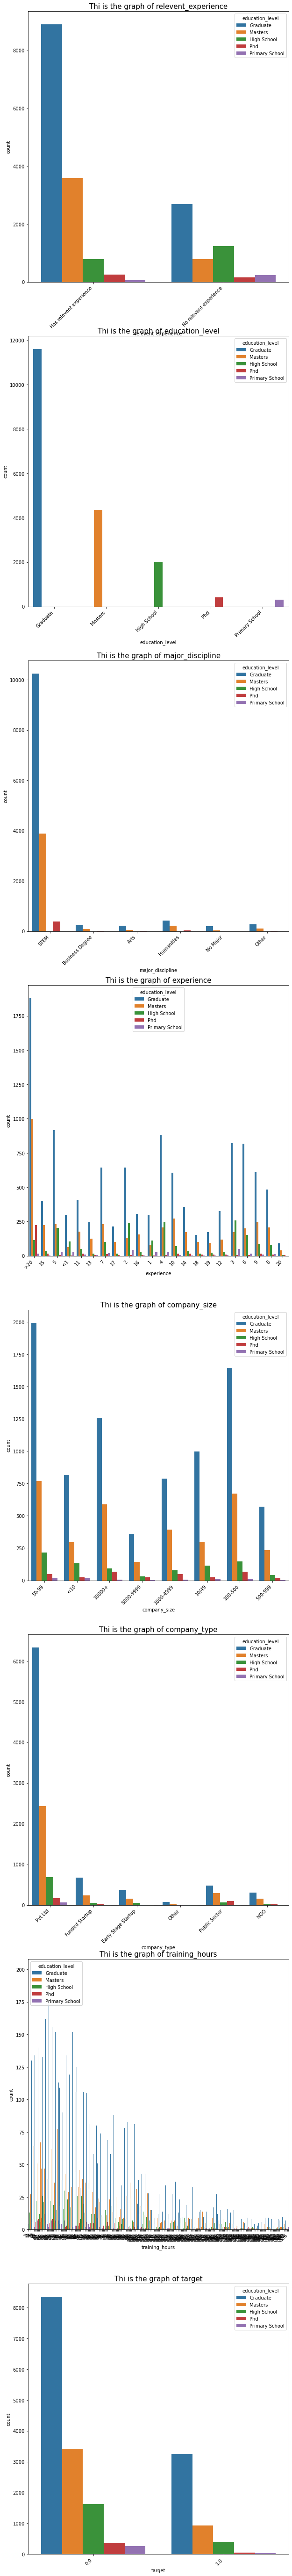

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
#Barplots showing each category seperated by education level
variables= ['relevent_experience', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'training_hours', 'target']
plt.figure(figsize=(10,100))

n=1
for i in variables:
    plt.subplot(8,1,n)
    ax=sns.countplot(x=i, hue='education_level', data=train)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.title(f'Thi is the graph of {i}', fontsize=15)
    n=n+1
    
plt.show()
print()

Text(0.5, 1.0, 'Countplot of Experience By Degree Level')

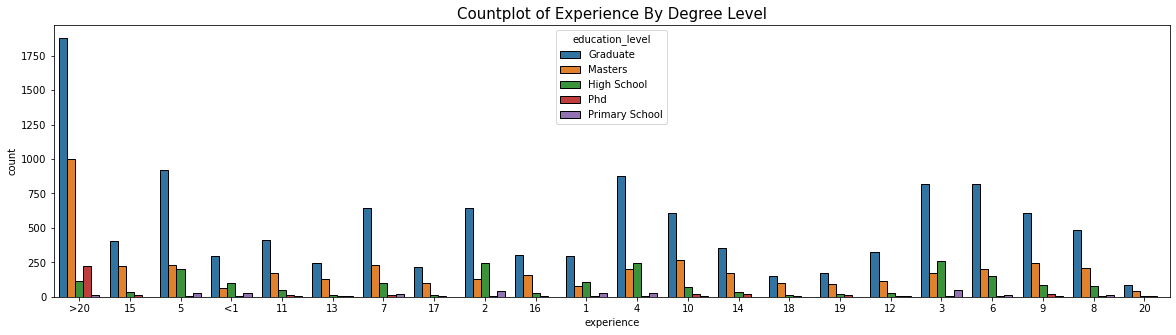

In [15]:
plt.figure(figsize=(20,5))
sns.countplot('experience', data=train, hue='education_level', edgecolor='black')
plt.title('Countplot of Experience By Degree Level', fontsize=15)

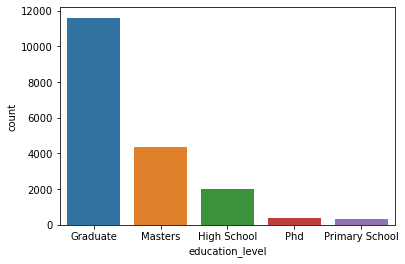

In [17]:
sns.countplot('education_level', data=train)

([<matplotlib.patches.Wedge at 0x7f6e7c319450>,
 [Text(-0.4058373664607044, 1.022397198736499, 'Graduate'),
  Text(-0.09045906830596125, -1.0962742161344567, 'Masters'),
  Text(0.919198372304279, -0.6042138299916382, 'High School'),
  Text(1.0835690829723417, -0.18941500053184424, 'Phd'),
  Text(1.0985274348514376, -0.056898812630149516, 'Primary School')])

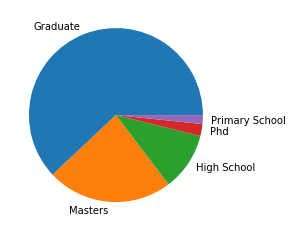

In [18]:
#Making a pie chart of education level
df3=train['education_level'].value_counts()
plt.pie(df3.values, labels=df3.index)

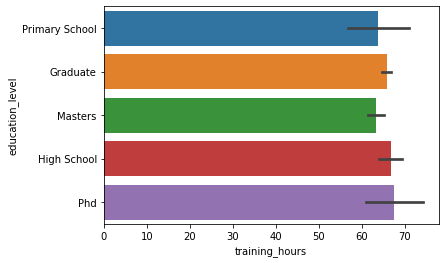

In [51]:
#Plot of Training hours
p= train.sort_values(by='training_hours', ascending=True)
p

sns.barplot(x=p.training_hours, y=p.education_level)

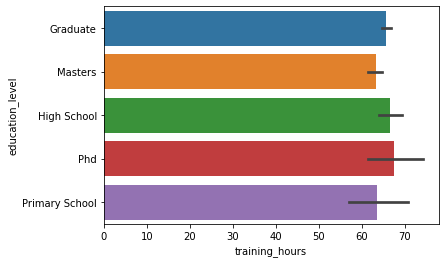

In [21]:
#Plot of highest Education LEvel achieved VS Trainig Hours
sns.barplot(x=train.training_hours, y=train.education_level)

#Highest number of training g=hours is acg=hieved by PHd students.

In [55]:
import plotly.express as px

cd=train['city_development_index'].value_counts().reset_index()
cd.columns=['city_development_index', 'count']
cd['city_development_index']=cd['city_development_index'].astype(str) + '-'

cd.head()

city_development_index  count
0                  0.92-   5200
1                 0.624-   2702
2                  0.91-   1533
3                 0.926-   1336
4                 0.698-    683

In [56]:
cd.sort_values(by='count', ascending=True)

fig= px.bar(cd, x='count', y='city_development_index')
fig.show()

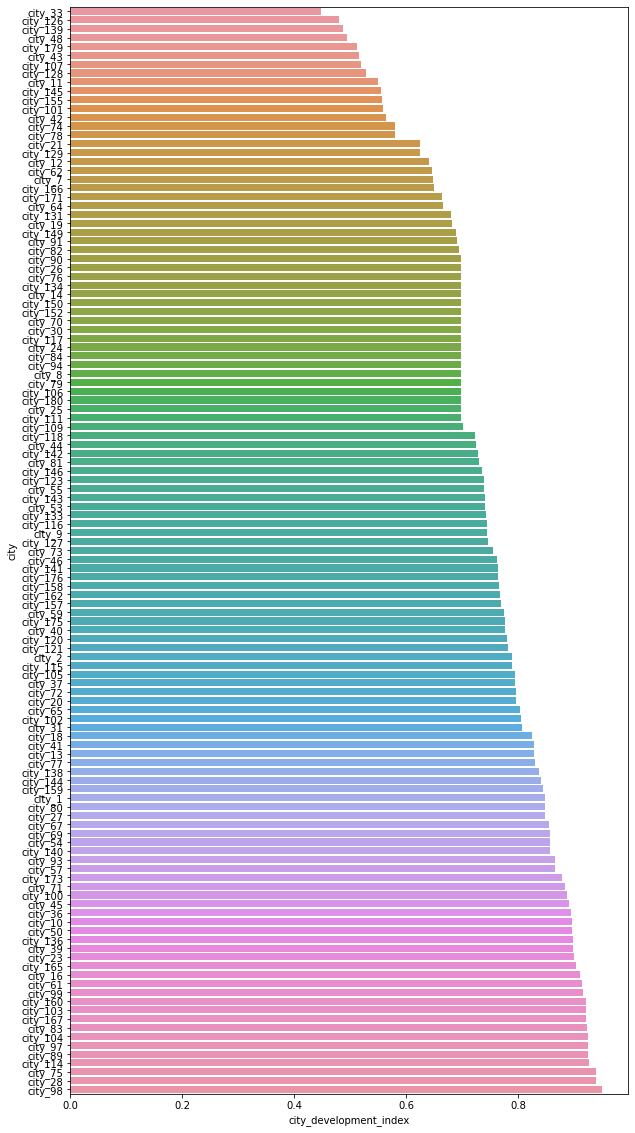

In [57]:
cdi= train.sort_values(by='city_development_index', ascending=True)

plt.figure(figsize=(10,20))
sns.barplot(y=cdi.city, x=cdi.city_development_index)

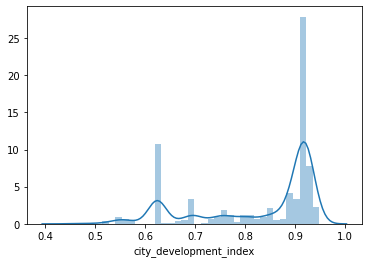

In [28]:
#Distribution plot of Development Index. Majority density lies in area around 0.9\
#Also it is a multi modal distribution as can be seen.

sns.distplot(train['city_development_index'])

In [58]:
ex=train['experience'].value_counts().reset_index()
ex.columns=['experience', 'count']

([<matplotlib.patches.Wedge at 0x7f6e71ce7810>,
 [Text(0.9430926846212612, 0.5661944791446332, '>20'),
  Text(0.2765486075058483, 1.0646693701269783, '5'),
  Text(-0.2314698115813275, 1.0753705065355406, '4'),
  Text(-0.6793301481492854, 0.865165041951806, '3'),
  Text(-0.9745381122765342, 0.5101719981736447, '6'),
  Text(-1.0948556549934891, 0.10625956299918796, '2'),
  Text(-1.0636382573232384, -0.2804882485210115, '7'),
  Text(-0.9146103009763745, -0.6111366437613651, '10'),
  Text(-0.6730487723881475, -0.8700605438627864, '9'),
  Text(-0.392849797489371, -1.0274575595189128, '8'),
  Text(-0.13207895435917558, -1.0920417344659439, '15'),
  Text(0.11175272160712751, -1.0943086078494493, '11'),
  Text(0.33288787092598493, -1.0484205575008365, '14'),
  Text(0.5217609182851993, -0.9683829532525786, '1'),
  Text(0.6834507111603606, -0.8619136415061531, '<1'),
  Text(0.8190358814978566, -0.734288924619614, '16'),
  Text(0.9284444157650453, -0.589907591775783, '12'),
  Text(1.0048067282270

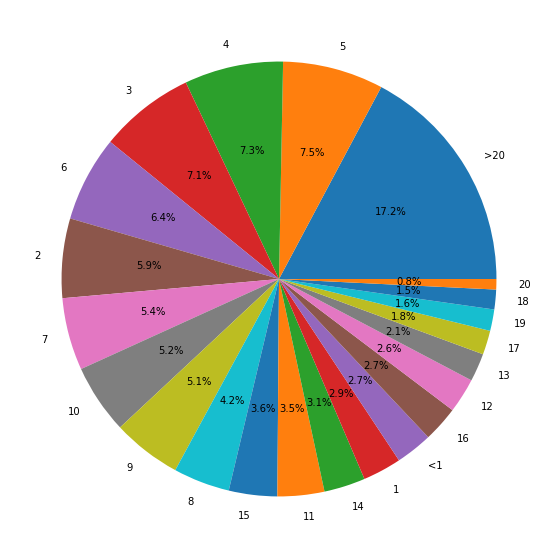

In [59]:
plt.figure(figsize=(10,10))
plt.pie(ex['count'], labels=ex.experience, autopct='%1.1f%%' )

#Pyplot for years of experience people have. Majority of people who use Kaggle and are in Data Science filed have more than 20 years of experience.

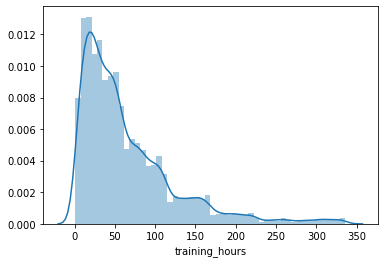

In [31]:
#It shows the distribution of Training hours. The jority lies ariund zero means most of people are untrained.

sns.distplot(train['training_hours'])

In [32]:
# Want to check Gender distribution for Masters Category only
train[['gender', 'target']][train['education_level']=='Masters']

gender  target
4        Male     0.0
20       Male     0.0
21       Male     0.0
22        NaN     0.0
40     Female     0.0
...       ...     ...
19131    Male     0.0
19136     NaN     1.0
19138     NaN     0.0
19148     NaN     1.0
19149    Male     1.0

[4361 rows x 2 columns]

In [60]:
def edu(x):
    y=train[['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target']][train['education_level'] == x]
    
    y=y.sort_values(by='enrollee_id', ascending= False)
    
    return y.head()

# **Finding Some Correlations** 

In [61]:
corr= train.corr()['target']
corr[np.argsort(corr, axis=0)]

city_development_index   -0.341665
training_hours           -0.021577
enrollee_id               0.049475
target                    1.000000
Name: target, dtype: float64

In [63]:
df6=corr[np.argsort(corr, axis=0)[:-1]].reset_index()
df6

index    target
0  city_development_index -0.341665
1          training_hours -0.021577
2             enrollee_id  0.049475

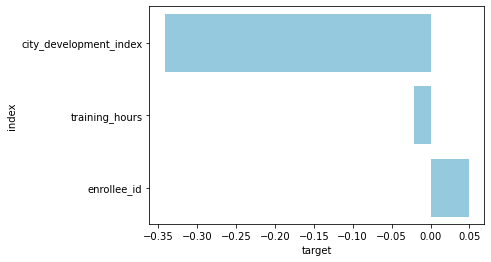

In [64]:
sns.barplot('target','index', data=df6, color='skyblue')

# **Importing the Test data and Pre processed it.**

In [95]:
#Testing data 
test=pd.read_csv('/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv')
print('test read successfully')

test read successfully


In [96]:
test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [97]:
for i in cat_columns:
    test[i]= test[i].fillna(test[i].mode()[0])
#filling Na values by mode for categorcal columns

In [98]:
test.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

# **Encoding the Data**

In [70]:
#Encoding the data 
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
train[cat_columns]=train[cat_columns].apply(lambda x : le.fit_transform(x))

In [75]:
test[cat_columns]= test[cat_columns].apply(lambda x: le.fit_transform(x))

In [76]:
target= train['target']
target.head(100).values

array([1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.])

In [77]:
inp_values= train.drop('target', axis=1)
inp_values

enrollee_id  city  city_development_index  gender  relevent_experience  \
0             8949     5                   0.920       1                    0   
1            29725    77                   0.776       1                    1   
2            11561    64                   0.624       1                    1   
3            33241    14                   0.789       1                    1   
4              666    50                   0.767       1                    0   
...            ...   ...                     ...     ...                  ...   
19153         7386    55                   0.878       1                    1   
19154        31398     5                   0.920       1                    0   
19155        24576     5                   0.920       1                    0   
19156         5756    94                   0.802       1                    0   
19157        23834    95                   0.855       1                    1   

       enrolled_university  education_level  major_discipline  experience  \
0                        2                0                 5          21   
1                        2                0                 5           6   
2                        0                0                 5          15   
3                        2                0                 1          20   
4                        2                2                 5          21   
...                    ...              ...               ...         ...   
19153                    2                0                 2           5   
19154                    2                0                 5           5   
19155                    2                0                 5          21   
19156                    2                1                 5          20   
19157                    2                4                 5          11   

       company_size  company_type  last_new_job  training_hours  
0                 4             5             0              36  
1                 4             5             4              47  
2                 4             5             5              83  
3                 4             5             5              52  
4                 4             1             3               8  
...             ...           ...           ...             ...  
19153             4             5             0              42  
19154             4             5             3              52  
19155             4             5             3              44  
19156             5             5             1              97  
19157             4             5             0             127  

[19158 rows x 13 columns]

In [78]:
test.shape

(2129, 13)

# **Model Buliding**

In [80]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test= train_test_split(inp_values, target, test_size=0.2)

In [85]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=100, n_jobs=4)

In [86]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4)

In [99]:
y_pred= rf.predict(X_test)
y_pred

array([0.56694293, 0.19632643, 0.09770993, ..., 0.09617708, 0.08239854,
       0.09690771])

In [100]:
print(r2_score(y_test, y_pred))

0.18964862704257346


# **CatBoost Regressor**

In [107]:
from catboost import CatBoostRegressor, Pool

#Now, we define the model
model= CatBoostRegressor(objective='RMSE', verbose=0)

#Training the model
model.fit(inp_values, target)

In [111]:
#Making prediction
predictions= model.predict(X_test)
predictions

array([0.70543677, 0.40562432, 0.09811438, ..., 0.1089503 , 0.04200689,
       0.14417853])

In [113]:
#Summarising accuracy metrics

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(train['target'],  model.predict(inp_values))
metrics.auc(fpr, tpr)
#fpr= False Positive Rate
#tpr= True Positive Rate

0.893295728377217

# **Making Submissions**

In [116]:
submissions= pd.DataFrame({'enrollee_id': X_test['enrollee_id'], 'target': predictions})

In [117]:
submissions.head(10)

enrollee_id    target
7281         32640  0.705437
18291        10852  0.405624
13441        22616  0.098114
10814        21995  0.091325
1293         32241  0.113201
10135        31747  0.472066
7713         14853  0.652643
17506        22804  0.656961
6269          9350  0.309330
5144          8156  0.621641